## Tulot ja koulutus

In [2]:
library(readxl)
library(ggplot2)

In [14]:
data = read_xlsx("~/Documents/Datasets/education.xlsx")
df = data.frame(data)
df = na.omit(df)
attach(df)
head(df)

,age,gndr,earnings,education
,<dbl>,<chr>,<dbl>,<dbl>
1,30,male,34.61538,160
2,30,female,19.23077,160
3,30,female,13.73626,120
4,30,female,13.94231,130
5,30,female,19.23077,160
6,30,female,8.00000,120


In [18]:
#Putsataan dataa

#Koulutus vuosissa on ilmoitettu kymmenkertaisena
df$education = df$education/10

#Muutetaan sarakkeiden nimet
colnames(df) = c("age","gender","earnings","education")

#Korjataan yksi ikä-muuttujan arvo 
df["age"][df["age"] == "72"] <- "30"

education = df
head(df)

,age,gender,earnings,education
,<chr>,<chr>,<dbl>,<dbl>
1,30,male,34.61538,16
2,30,female,19.23077,16
3,30,female,13.73626,12
4,30,female,13.94231,13
5,30,female,19.23077,16
6,30,female,8.00000,12


`geom_smooth()` using formula 'y ~ x'



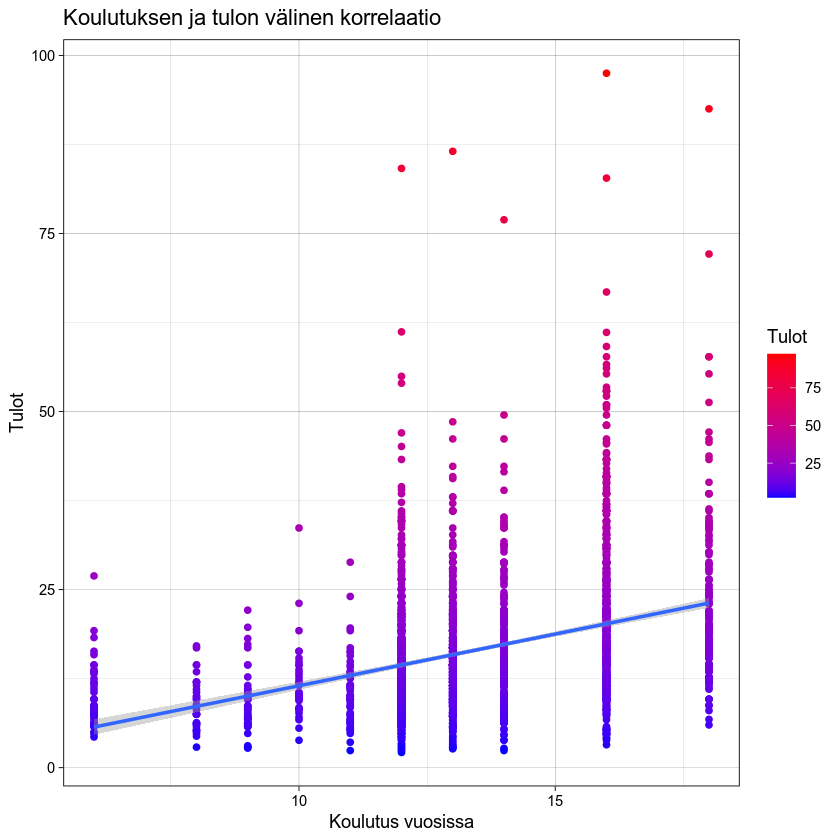

In [23]:
edu =ggplot(df, aes(x=education,y=earnings, col=earnings)) +
     geom_point() +
     geom_smooth(method="lm")+
     xlab("Koulutus vuosissa") +
     ylab("Tulot") +
     labs(title="Koulutuksen ja tulon välinen korrelaatio",
          col = "Tulot",
          size="") +
     scale_color_gradient(low="blue", high="red") +
     theme_linedraw()
     
edu 

In [21]:
#Tarkastellaan regressiosovitetta
reg = lm(earnings~education,df)
summary(reg)


Call:
lm(formula = earnings ~ education, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.115  -5.274  -1.437   3.259  77.287 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.00475    0.95789  -3.137  0.00173 ** 
education    1.45110    0.06969  20.823  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.604 on 2839 degrees of freedom
Multiple R-squared:  0.1325,	Adjusted R-squared:  0.1322 
F-statistic: 433.6 on 1 and 2839 DF,  p-value: < 2.2e-16


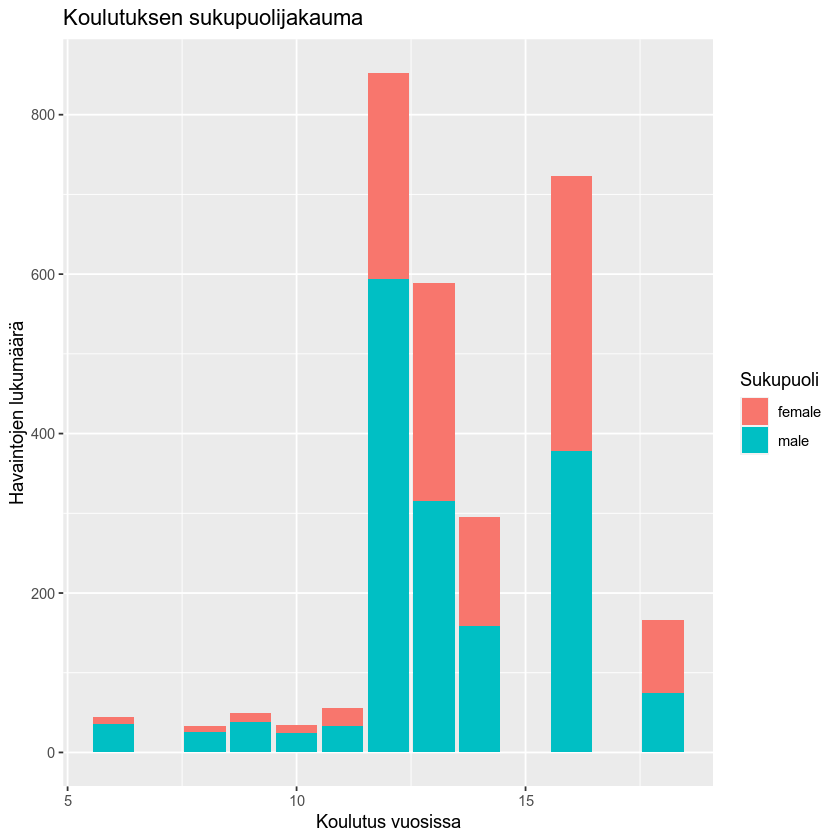

In [28]:
edu2 =ggplot(df, aes(x=education,fill=gender)) +
      geom_bar() +
      xlab("Koulutus vuosissa") +
      ylab("Havaintojen lukumäärä") +
      labs(title="Koulutuksen sukupuolijakauma",
          fill="Sukupuoli",
          )
edu2